<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Product_Recommendation_System_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Product Recommendation System for E-Commerce Website**

A recommendation engine in Python is a software tool that uses machine learning to suggest items to a user based on their **interests, preferences,Rating, and behavior**. Recommendation engines are used by many companies, including **Netflix, Amazon, YouTube, and Spotify**, to improve user experience and drive revenue

# **Import Library**

In [1]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import sklearn
from sklearn.decomposition import TruncatedSVD

# **Load Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ratings_Beauty_Product.csv to ratings_Beauty_Product.csv


In [3]:
rating=pd.read_csv('ratings_Beauty_Product.csv')
rating.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
rating.isnull().sum()

,0
UserId,0
ProductId,0
Rating,0
Timestamp,0


In [4]:
amazon_rating=rating.dropna()
amazon_rating.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
#groupby rating by productid
rating_count = pd.DataFrame(amazon_rating.groupby('ProductId')['Rating'].count())
most_rating=rating_count.sort_values('Rating', ascending=False).head(10)
most_rating.head()
#

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


<Figure size 1000x300 with 0 Axes>

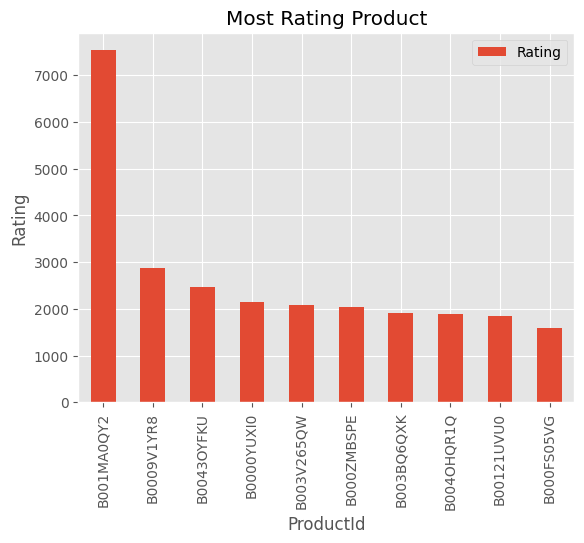

In [6]:
#plotting most_rating data
fig=plt.figure(figsize=(10,3))
most_rating.plot(kind='bar')
plt.xlabel('ProductId')
plt.ylabel('Rating')
plt.title('Most Rating Product')
plt.show()


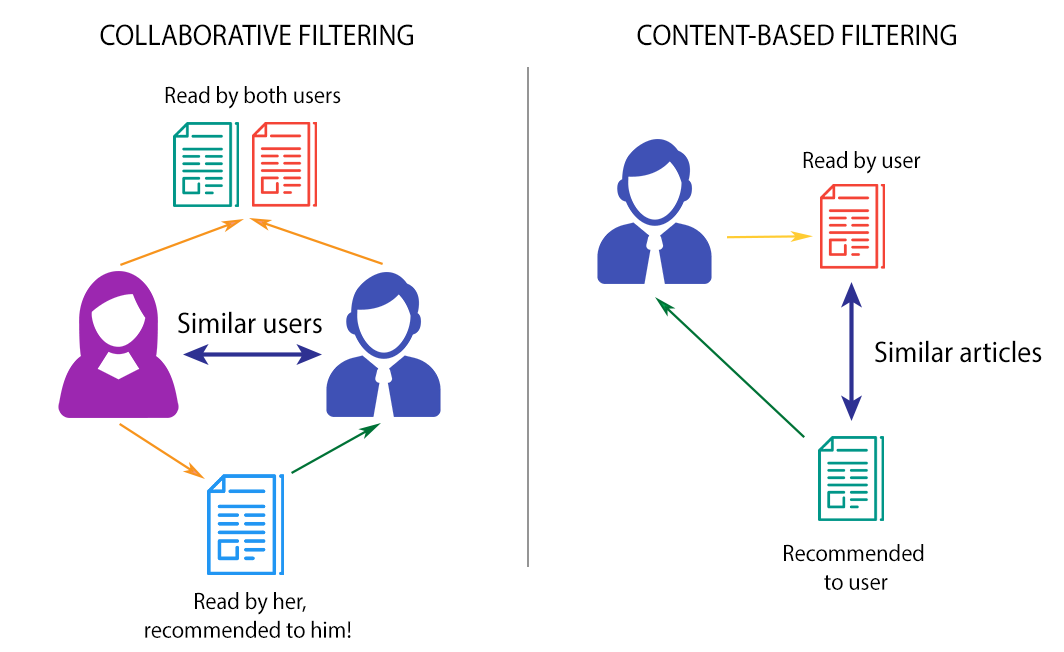

# **Model Based Collaborative Filtering System**

In [7]:
#subset of rating
amazon_rating1=amazon_rating.head(10000)
amazon_rating1.shape

(10000, 4)

In [8]:
#show pivot tables of ratings
ratingMatrix=amazon_rating1.pivot_table(index=['UserId'],columns=['ProductId'],values='Rating',fill_value=0)
ratingMatrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#shape of rating
ratingMatrix.shape

(9697, 886)

In [10]:
#Transposing the matrix
X=ratingMatrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(886, 9697)

In [ ]:
#unique product
X1=X

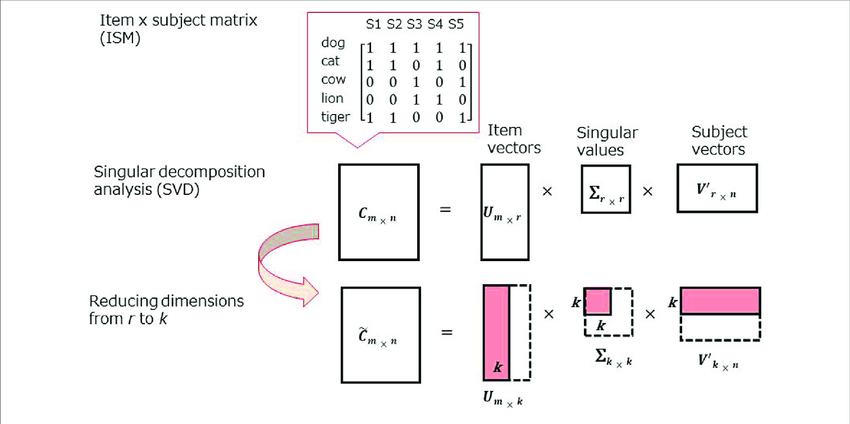

In [11]:
#Decomposing the matrix
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD=TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
decomposed_matrix

array([[-6.05718169e-16,  3.67623783e-14, -3.42949288e-14, ...,
         9.68880415e-13, -7.59445161e-13, -1.96482289e-12],
       [ 4.75640932e-14,  1.48481377e-12, -7.36053630e-14, ...,
         1.45924244e-11, -2.26239489e-11, -6.93379646e-11],
       [ 2.16887762e-16,  5.82301993e-15,  3.46838935e-15, ...,
         3.49370089e-14, -5.85464259e-14, -2.31132560e-14],
       ...,
       [ 3.34750003e-06,  2.27951253e-01, -1.04084890e-02, ...,
        -3.76957501e-03, -5.98145337e-05, -4.90195615e-02],
       [ 1.50567751e-06,  8.94551004e-04,  1.15903289e-05, ...,
         5.48185550e-04, -1.33781840e-03, -3.13737245e-03],
       [ 2.57507909e-04,  4.18283171e-01,  3.54585287e-01, ...,
        -2.20919333e-02,  6.27159430e-02, -1.07169479e-01]])

In [12]:
#Correlation Matrix
import numpy as np
correlation_matrix=np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
correlation_matrix

array([[1.        , 0.97007693, 0.67371409, ..., 0.27118195, 0.63623024,
        0.16511905],
       [0.97007693, 1.        , 0.57936105, ..., 0.32197041, 0.69628721,
        0.30241552],
       [0.67371409, 0.57936105, 1.        , ..., 0.17686438, 0.66473725,
        0.20686348],
       ...,
       [0.27118195, 0.32197041, 0.17686438, ..., 1.        , 0.30172583,
        0.21939084],
       [0.63623024, 0.69628721, 0.66473725, ..., 0.30172583, 1.        ,
        0.71773046],
       [0.16511905, 0.30241552, 0.20686348, ..., 0.21939084, 0.71773046,
        1.        ]])

Assuming the cusotmer buys productid randomly

In [13]:
X.index[99]

'6117036094'

In [14]:
index_value='6117036094'
productName=list(X.index)
productID=productName.index(index_value)
productID


99

In [15]:
#Correlation for all item purchase by user
correlation_productID=correlation_matrix[productID]
correlation_productID.shape

(886,)

In [16]:
#Recommending top 10 highly correlated product
Recommend=list(X.index[correlation_productID>0.90])
Recommend.remove(index_value)
Recommend[0:10]

['1304351475',
 '3222000565',
 '4057362797',
 '4057363823',
 '6040652705',
 '8072222120',
 '8096398741',
 '8982641262',
 '9502737628',
 '957696718X']

**Recommanded based on Textual Clustering. Usert Item Purchase History**

In [17]:
#import machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score


#Item Based Recommendation based on product description

In [18]:
from google.colab import files
uploaded = files.upload()

Saving product_descriptions.csv to product_descriptions.csv


In [19]:
prod_desc=pd.read_csv('product_descriptions.csv')
prod_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [20]:
#Missing values
prod_desc.isnull().sum()

,0
product_uid,0
product_description,0


In [21]:
#Feature extraction
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(prod_desc['product_description'])
X

<124428x268559 sparse matrix of type '<class 'numpy.float64'>'
	with 8256891 stored elements in Compressed Sparse Row format>

In [27]:
#fitting k-means
true_k=10
model=KMeans(n_clusters=true_k,init='k-means++',max_iter=100,n_init=1)
# model.fit(X)

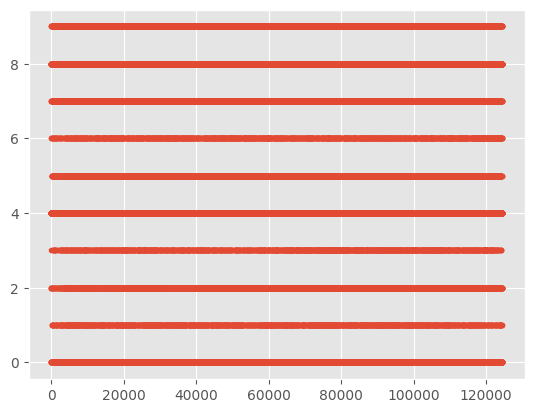

In [28]:
#predicting and visualise
y_pred=model.fit_predict(X)
plt.plot(y_pred,'.')
plt.show()

In [34]:
#optimal cluster
tk=10
model=KMeans(n_clusters=true_k,init='k-means++',max_iter=100,n_init=1)
y_pred=model.fit(X)
print("Top terms per cluster:")
order_centroids=model.cluster_centers_.argsort()[:,::-1]
terms=vectorizer.get_feature_names_out()
for i in range(true_k):
  print("Cluster %d:" %i)
  for ind in order_centroids[i,:10]:
    print(' %s' %terms[ind])


Top terms per cluster:
Cluster 0:
 easy
 ft
 use
 wood
 home
 wall
 design
 steel
 durable
 resistant
Cluster 1:
 fan
 oven
 cooking
 cu
 freezer
 ceiling
 ft
 refrigerator
 food
 temperature
Cluster 2:
 grade
 nuts
 laminate
 proposition
 residents
 nbsp
 65
 california
 wood
 screws
Cluster 3:
 tile
 indoor
 residential
 recommended
 thinset
 frost
 piece
 pieces
 wall
 commercial
Cluster 4:
 door
 doors
 glass
 shower
 panel
 adjustable
 steel
 hinges
 cabinet
 hardware
Cluster 5:
 light
 energy
 bulb
 watt
 led
 lighting
 hours
 bulbs
 incandescent
 white
Cluster 6:
 vanity
 glass
 hardware
 finish
 collection
 cabinet
 light
 nickel
 included
 fixture
Cluster 7:
 shower
 water
 faucet
 sink
 valve
 drain
 handle
 tub
 brass
 design
Cluster 8:
 steel
 power
 use
 air
 volt
 tool
 cutting
 blade
 pipe
 designed
Cluster 9:
 paint
 vary
 rug
 colors
 color
 gloss
 slightly
 wood
 mn
 ri


In [43]:
#predicting cluster based on key search
def disp_recomd(prod):
  Y=vectorizer.transform([prod])
  prediction=model.predict(Y)
  i=prediction[0]
  for ind in order_centroids[i,:10]:
    print(' %s' %terms[ind])

In [44]:
#Keyword - cutting tool
disp_recomd('cutting tool')

 steel
 power
 use
 air
 volt
 tool
 cutting
 blade
 pipe
 designed


In [45]:
#Keyword - spray paint
disp_recomd('spray paint')

 paint
 vary
 rug
 colors
 color
 gloss
 slightly
 wood
 mn
 ri


In [46]:
#Keyword- steel drill
disp_recomd('steel drill')

 steel
 power
 use
 air
 volt
 tool
 cutting
 blade
 pipe
 designed


In [48]:
#keyword- water
disp_recomd('water')

 shower
 water
 faucet
 sink
 valve
 drain
 handle
 tub
 brass
 design


-------------Ending----------